In [14]:
import csv 
import numpy as np 
import pandas as pd
import sys
import os

from matplotlib import cm
import matplotlib.pyplot as plt
import plotly.express as px 

plt.rcParams['figure.figsize'] = [12, 10]
%matplotlib inline

In [4]:
target_file = '../data/cluster_outputs/riot_games_LOL/v2/756260657.csv'

dat = []

with open(target_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            dat.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are sent_time, raw_chat_message, processed_chat_message, cluster_num, x, y
Processed 83398 lines.


In [5]:
dat = pd.DataFrame(dat, columns = ['time', 'msg', 'msg_clean', 'cluster', 'x', 'y'])

In [6]:
times = []
clusters = []
x_plt, y_plt = [], []
times_rounded = []
time_set = set()

# window in minutes 
window=1
busiest_minute = 213

start_time = (busiest_minute*60)-((window-1)*60*0.5)
end_time = start_time+(window*60)

print(start_time, end_time)

for index, row in dat.iterrows():
    if index > 0: 
        time_split = [float(x) for x in row['time'].split(':')]
        time_processed = time_split[0]*3600+time_split[1]*60+time_split[2]-18
        rounded = round(time_processed, 1)
        
        if rounded < end_time and rounded > start_time:
            times.append(rounded)
            
            if times_rounded and rounded - times_rounded[0] in time_set:
                app_index = times_rounded.index(round(rounded-times[0], 1))

                clusters[app_index].append(row['cluster'])
                x_plt[app_index].append(row['x'])
                y_plt[app_index].append(row['y'])   
            else:
                times_rounded.append(rounded)
                times_rounded[-1] = round(times_rounded[-1] - times[0], 1)
                clusters.append([int(row['cluster'])])
                x_plt.append([float(row['x'])])
                y_plt.append([float(row['y'])])
            time_set.add(rounded)

12780.0 12840.0


In [146]:
print(times_rounded)
len(times_rounded)

[0.0, 0.2, 0.5, 0.7, 1.1, 1.4, 1.7, 4.3, 4.5, 4.8, 5.8, 6.3, 6.6, 6.7, 7.9, 8.0, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.3, 9.7, 9.8, 10.1, 10.6, 11.0, 11.1, 11.4, 11.5, 11.6, 11.8, 11.9, 12.2, 12.3, 12.6, 12.8, 13.0, 13.5, 14.1, 14.4, 14.5, 14.9, 15.0, 15.1, 15.2, 15.3, 15.5, 15.8, 15.9, 16.2, 16.3, 16.5, 16.8, 16.9, 17.2, 17.3, 17.4, 17.8, 17.9, 18.1, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.1, 19.2, 19.3, 19.4, 19.8, 19.9, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.5, 22.6, 22.7, 22.9, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.7, 25.8, 27.3, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.3, 28.4, 28.7, 28.8, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 31.0, 31.2, 31.3, 31.4, 31.5, 31.6, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.5, 32.6, 32.7, 32.8, 32.9, 33.4, 33.5, 33.7, 33.8, 34.2, 34.3, 34.5, 34.6, 34.8, 34.9, 35.0, 35.1, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.5, 36.6, 36.7, 36.8, 36.9, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1

309

working...0.0


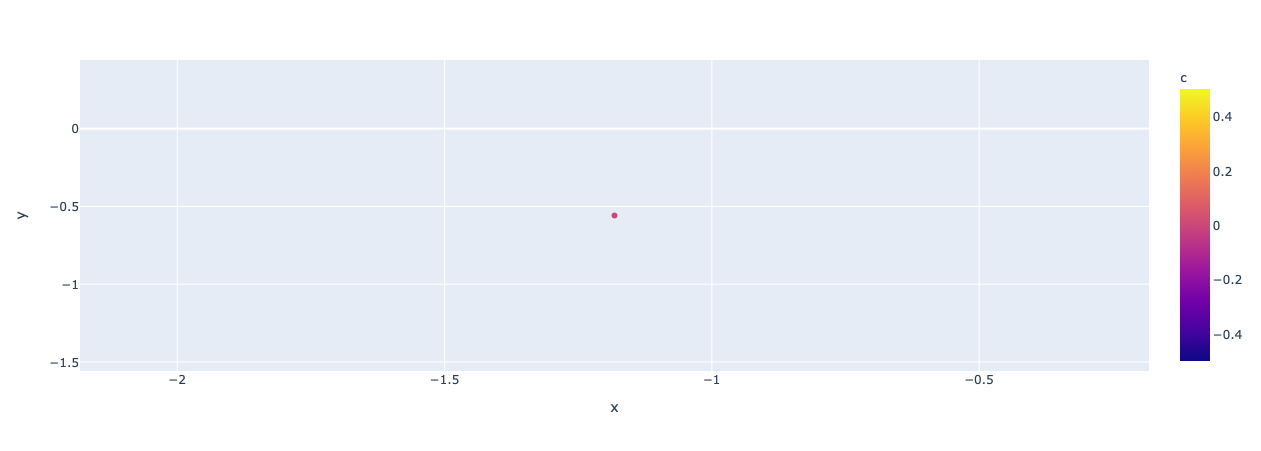

working...0.1


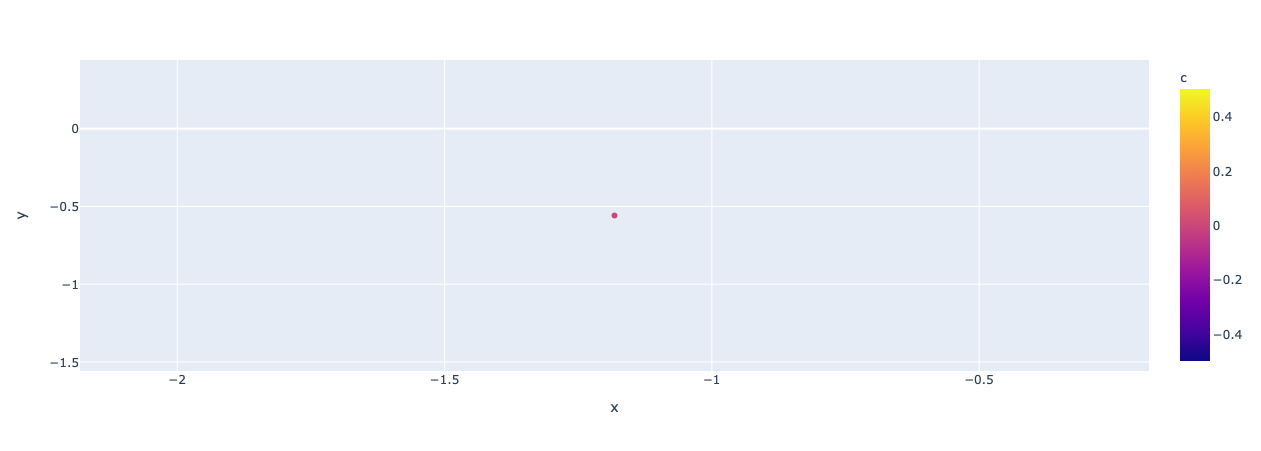

KeyboardInterrupt: Interrupted by user

<Figure size 432x288 with 0 Axes>

In [31]:
timeline = [round(x,1) for x in np.linspace(0,window*60, window*60*10+1)]
x_dat = []
x_prev = []
y_dat = []
y_prev = []
cluster_dat = []

for milli in timeline: 
    print('working...'+ str(milli))
    if milli in times_rounded:
        target_ind = times_rounded.index(milli)
        x_dat += x_plt[target_ind]
        y_dat += y_plt[target_ind]
        cluster_dat += clusters[target_ind]
    
    data = {'x' : x_dat,
           'y' : y_dat,
           'c' : cluster_dat}
    
    df = pd.DataFrame(data)        
#     plt.scatter(x_dat, y_dat, c=cluster_dat)
#     fig = px.scatter(x=x_dat, y= y_dat, color=cluster_dat)
    fig = px.scatter(df, x="x", y="y", color="c")
    fig.show()
    input()
    plt.savefig(f"../visualization/frames/frame_{milli}", format='png')

In [ ]:
import imageio

gif_name = "first_run"
timeline = [round(x,1) for x in np.linspace(0,window*60, window*60*10+1)]

filenames = []
for milli in timeline: 
    filenames.append(f"../visualization/frames/frame_{milli}")

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
print(len(images), " images loaded")
imageio.mimsave(f'../visualization/{gif_name}.gif', images, duration=0.1)
print('gif complete')

In [ ]:
   def _visualize_embedding(self):
        print("Visualizing...")
        
        self.data_df = pd.DataFrame(self.embeddings2d,columns=['x','y'])
        if self.cluster_method == 'torch_kmeans':
            self.data_df['cluster_num'] = ['C{}'.format(c) for c in self.torch_cluster_labels]
        else:   
            self.data_df['cluster_num'] = self.clusterer.labels_
        self.data_df['message'] = self.raw_used_messages
        
        if self.cluster_method == 'hdbscan':
            self.data_df = self.data_df[self.data_df['cluster_num']!=-1]
        
        fig = px.scatter(self.data_df, x="x", y="y", color="cluster_num",hover_data=['message','cluster_num'])
                                                       
        if self.visualize:
            fig.show();
        
        fig.write_html("../data/visualizations/v2/{}.html".format(self.vod_ID))

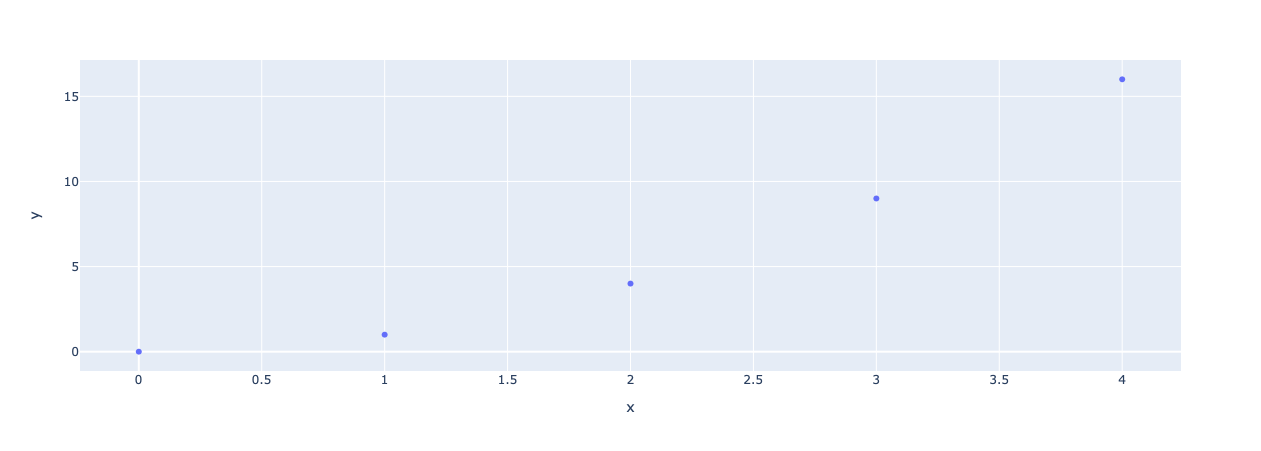

In [21]:
import chart_studio.plotly as py
import plotly.graph_objects as go

data = [go.Bar(x=df.School,
            y=df.Gap)]

py.iplot(data, filename='jupyter-basic_bar')

fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])

